In [11]:
import shutil

from utils._resnet import resnet18_8
from utils._preprocessing import _preprocessing
from utils._train import train
import numpy as np
import os
import scipy.io as sci

In [12]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

In [13]:
## DATASET Preprocessing parameter setting ##

train_dir_size = 5
BATCH_SIZE = 64
lr = 0.0001
fpath = f"./model_backups/resnet18_8_b{BATCH_SIZE}_lr{lr}_1000_noiseless/"
createFolder(fpath)

if os.path.exists(fpath + "checkpoint.pt"):
    print("Trained Model Exist")
else:
    
    model = resnet18_8()
    #############################################
    
    ## EVAL- DATASET PREPARE ##
    print("Eval dataset prepare")
    
    eval_set = np.load("./dataset_noiseless/eval_1000/0.npy", allow_pickle=True)
    eval_dataloader = _preprocessing(eval_set, batch_size=BATCH_SIZE)
    print("DONE")
    
    ## TRAIN- DATASET PREPARE ##
    print("Train dataset prepare")
    
    train_dataloaders = []
    
    for i in range(train_dir_size):
        print(f"{i/train_dir_size*100:.2f}%..", end="\r")
        train_set = np.load(f"./dataset_noiseless/train_1000/{i}.npy", allow_pickle=True)
        train_dataloader = _preprocessing(train_set, batch_size=BATCH_SIZE)
        train_dataloaders.append(train_dataloader)
    
    print("DONE")
    
    ###########################
    train(model, num_epochs=100, train_dataloaders=train_dataloaders, eval_dataloader=eval_dataloader,
          save_path="./model_ckpt/", lr=lr)
    shutil.copy("./model_ckpt/checkpoint.pt", fpath + "checkpoint.pt")
        

Trained Model Exist


In [16]:
from utils._model_results import _get_model_results
import matplotlib.pyplot as p

%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.style.use('physrev_noticks.mplstyle')
plt.rcParams['figure.dpi'] = "300"

Accuracy:  0.9488625


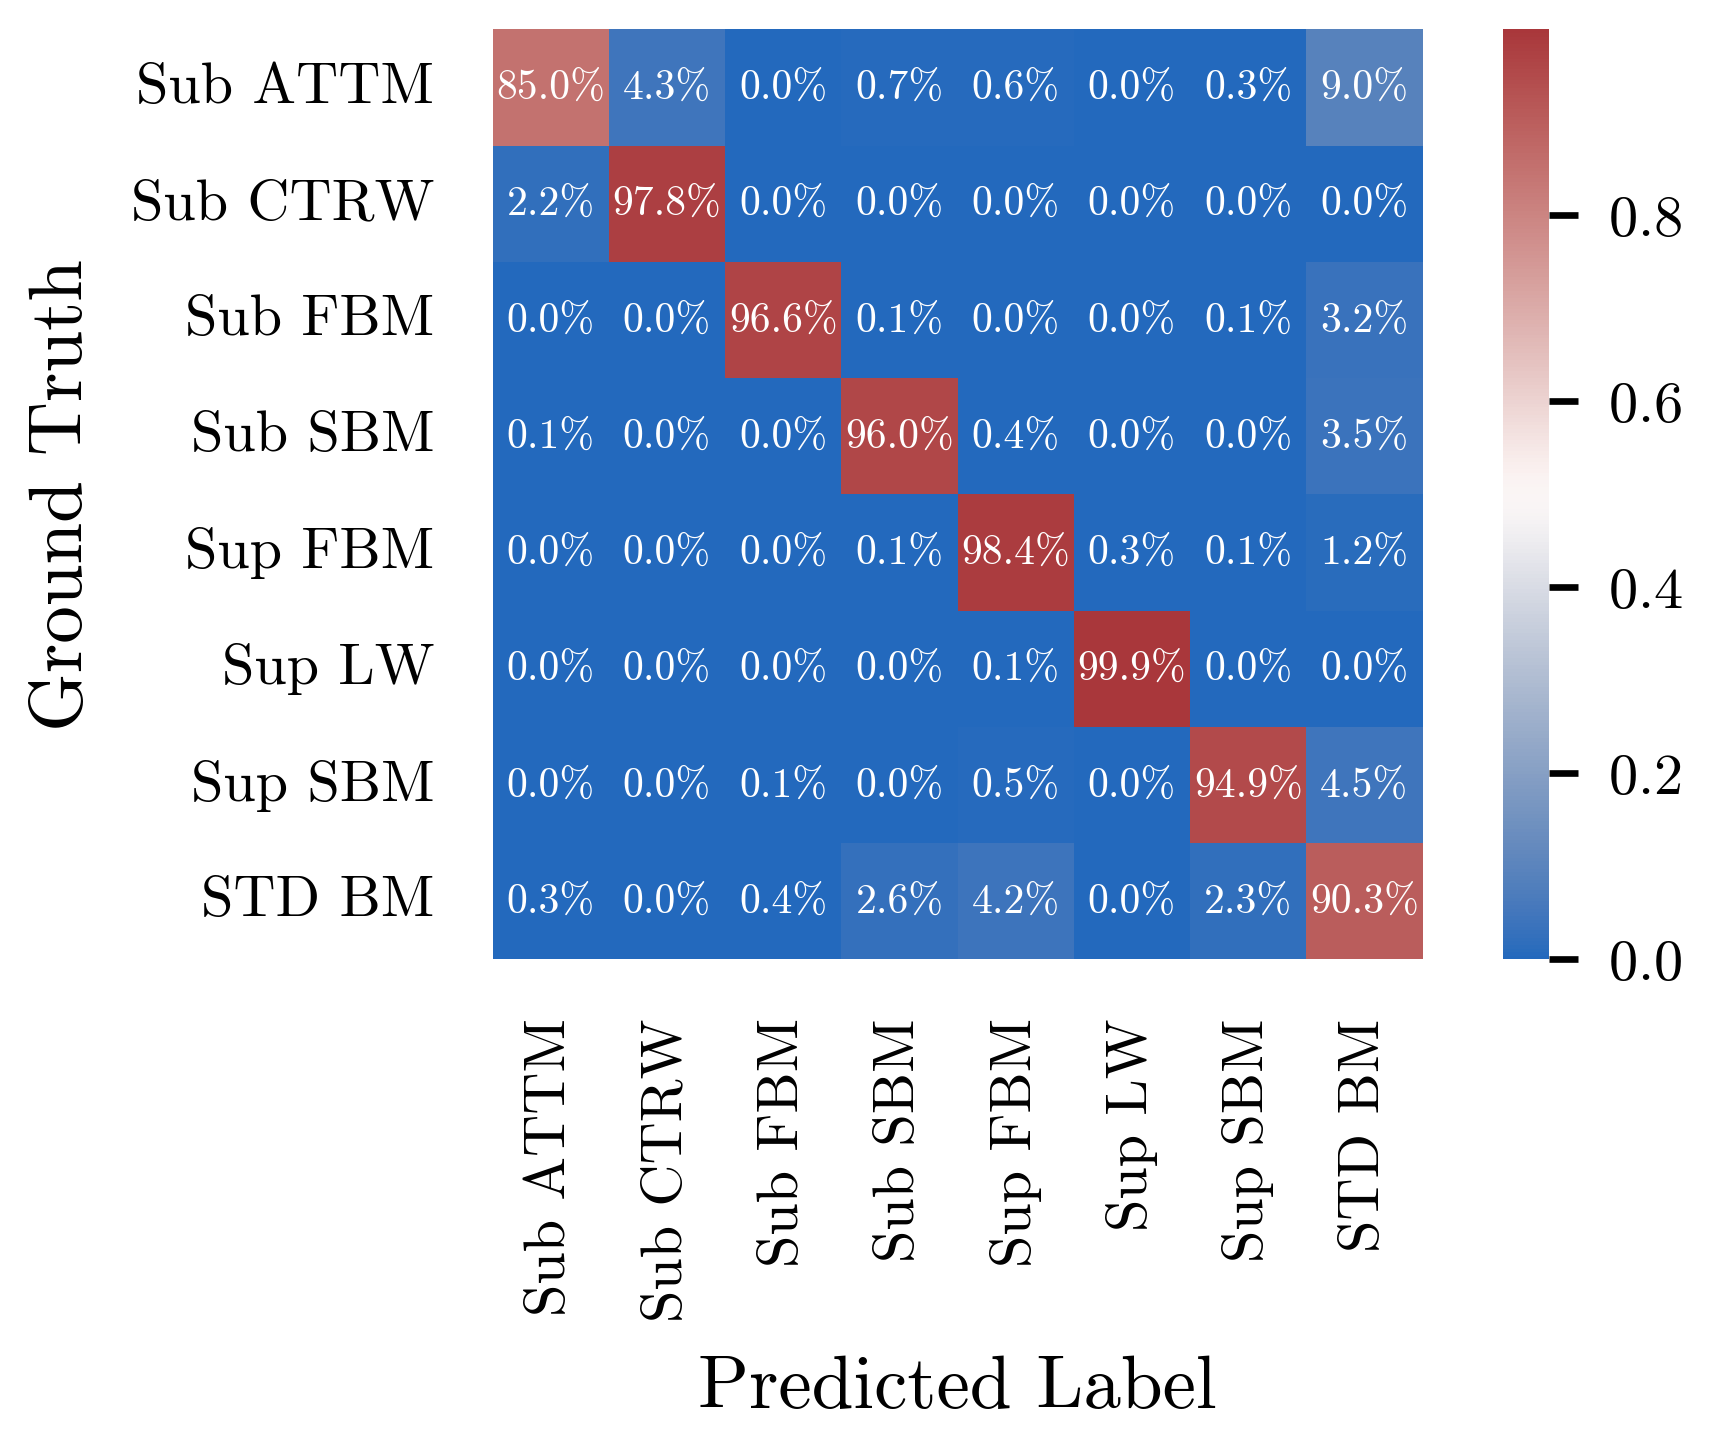

In [17]:
test_dataset = np.load("./dataset_noiseless/test_1000/0.npy", allow_pickle=True)
model_name = "resnet18_8_b64_lr0.0001_1000_noiseless"
model_results, ground_truth = _get_model_results(test_dataset, model_name, load=True, save=True)